# Hugging Face

Hugging Face is an American company that develops computation tools for building applications using machine learning. It is most notable for its transformers library built for natural language processing applications and its platform that allows users to share machine learning models and datasets and showcase their work. 

The goal of this tutorial is to introduce how to use dataset from hugging face.

## Searching for datasets

First, go to the `Datasets` tab of the Hugging Face website (https://huggingface.co/datasets) and search for the type of dataset you are interested in.

For this tutorial, the goal is to use a dataset that contains images of mathematical formulas generated using LaTeX code and their LaTeX equivalents. For example, there is this dataset: https://huggingface.co/datasets/OleehyO/latex-formulas.

On this page, you can see a preview of the dataset, some information about the dataset (size: 2.78GB, number of formulas (rows): 1,558,585, ...), and sometimes quick usage instructions.

## Load dataset

First, we will use the `datasets` Python package (which you need to install) and load the dataset (you need to have access to an internet connection to load the dataset for the first time). The first time you load a dataset, Python will download it, which can take some time depending on the dataset.

In [1]:
from datasets import load_dataset
ds = load_dataset("OleehyO/latex-formulas", "cleaned_formulas")

/home/maceo/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Note that the `"cleaned_formulas"` option is used to load a specific dataset. For more details, refer to the website page.

## Using dataset

In [2]:
print(type(ds))
print(ds)

<class 'datasets.dataset_dict.DatasetDict'>
DatasetDict({
    train: Dataset({
        features: ['image', 'latex_formula'],
        num_rows: 552340
    })
})


Has you can see, here our dataset only contain one set: `train`. Hovewer, lots of datasets contains multiple sets like: `train`, `validation` and `test`.

Moreover, the `train` dataset contain two keys: `'image'` and `'latex_formula'` and have 552340 rows.

To access any rows you can do:

In [3]:
train = ds['train']
row_0 = train[0] # The first row of the dataset
print(row_0['image'])
print(row_0['latex_formula'])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=323x44 at 0x72C4218CC230>
\begin{align*}-\div (y^{1-2m}\nabla w)=0\mbox{in}\mathbb R^n\times\mathbb R_+;w\big|_{y=0}=|u|\end{align*}


## Visualisation of images

To visualise the images, we can transform them into `numpy` array and them use `matplotlib.pyplot`.

In [4]:
import numpy as np

row = 2
arr = np.array(train[row]['image'])
print(type(arr))

<class 'numpy.ndarray'>


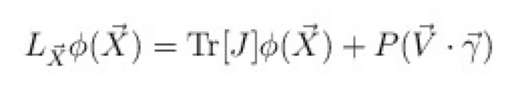

Latex equivalent:
 \begin{align*} L_{\vec{X}} \phi (\vec{X}) = \mbox{Tr}[J] \phi (\vec{X}) + P (\vec{V} \cdot \vec{\gamma})\end{align*}


In [5]:
import matplotlib.pyplot as plt

plt.imshow(arr)
plt.axis("off") # to hide the axis
plt.show()
print("Latex equivalent:\n", train[row]['latex_formula'])

# Sklearn digits

In this part, we will introduce how to use an existing database using the Python package named Sklearn. We will use a database of handwritten digit images.

## 1.Importing database

First, you will need to install the `sklearn` package. To do that, you can run the command: `pip install scikit-learn` in your terminal.

After that, we will load an existing database of handwritten digits.

As often, we will use the famous numpy package to manage arrays.

In [6]:
import numpy as np
import sklearn as sk
from sklearn import datasets

digits = datasets.load_digits()

## 2.Database information

This database is dictonnary composed of many informations that you can see by running

In [7]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


- `data` s the array of all images. An image, here, is represented as an array of floats of length 64 corresponding to an 8x8 image of shades of gray.
- `images` is the array of all images in another format. An image, here, is represented as a matrix of floats of size 8x8 corresponding to an 8x8 image of shades of gray.
- `target` is the array of target values of each image, i.e., the digit represented by the image.
- `taget_names` is  the array of all possible outcomes of value. Here, it is the array `[0 1 2 3 4 5 6 7 8 9]`

Remember that to access the size of a numpy array, you can use the method `.shape`.

In [8]:
print(digits.data.shape)

(1797, 64)


This means that `digits.data` is a matrix of size $1797 \times 64$

## 3.Data visualisation

We will use the matplotlib.pyplot package to render images of the database.

TODO: Create a function to render a single image from the database.

### Solution

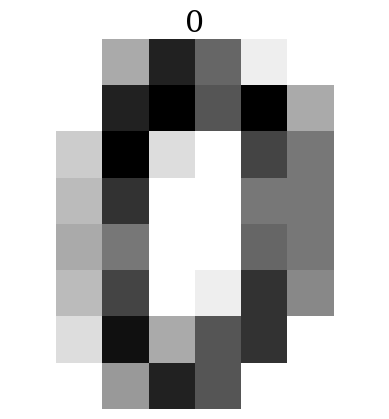

In [9]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size='18') # Just changing title policy

def show_image(i):
    # plot the i-th image of the database
    plt.imshow(digits.images[i],cmap='binary')
    plt.title(digits.target[i])
    plt.axis('off')
    plt.show()

show_image(0)

## 4.Splitting dataset

We need to split the trainning into two parts: 
- The tranining part (often around 80% of the database)
- The test part (so often 20% of the database)

We do that to train our model (that you will learn to do in other notebooks) on a large amout of data.

To have a proper understanding of how accurate our model is, we need to test it on data on which the model has not been trained. This is why we keep 20% of the database safe from learning.

In [10]:
import random as rd
from sklearn.model_selection import train_test_split

random_seed = rd.randint(0,4294967295)
trainning_size = 0.8
# Splitting dataset into 2 parts: trainning and test
res = train_test_split(digits.data, digits.target,
                        train_size=trainning_size, test_size=1-trainning_size,
                        random_state=random_seed)
train_data, test_data, train_labels, test_labels = res

print("dataset training:", train_data.shape)
print("dataset test    :", test_data.shape)

dataset training: (1437, 64)
dataset test    : (360, 64)


If you do not use a random seed, the `res` variable will always be the same. More specifically, the random seed randomized the choice of the `train_data` set and `test_data` is the complementary of `train_data`.

The value `4294967295` is the maximal possible value for random seed for the `train_test_split()` function.

`train_data` represents 80% of the dataset, train_labels is the target corresponding to the train_data set.

`test_data` represents the last 20% of the dataset, test_labels is the target corresponding to the test_data set.